In [101]:
import pandas as pd
import numpy as np
df=pd.read_csv('data/compare/rorgt_dhodh/AIxFuse.csv')
ref_sa=3.74619658218488
ref_qed=0.368308769245971
ref_aff1=-12.9913537202175
ref_aff2=-10.1629030495152
ref_sim3d1=0.5426944971537
ref_sim3d2=0.548154239766081
title_dict={}
sa_list=[]
df2=pd.read_csv('RORgt_DHODH_138_MMGBSA.csv')
ori_set=set(df2['SMILES'])


score_list=[]
for title,sa,qed,aff1,aff2,sim3d1,sim3d2,sim3d2d1,sim3d2d2,sim2d1,sim2d2 in zip(df['Title'],df['SA'],df['QED'],df['5NTP_XP'],df['6QU7_XP'],df['3D_sim_rorgt'],df['3D_sim_dhodh'],df['3D_sim_2D_rorgt'],df['3D_sim_2D_dhodh'],df['sim2d_rorgt'],df['sim2d_dhodh']):
    if np.isnan(sim3d1):
        sim3d1=0
    if np.isnan(sim3d2):
        sim3d2=0
    score=10
    # score-=max(0,ref_sim3d1-sim3d1)
    # score-=max(0,ref_sim3d2-sim3d2)
    if sim2d1<0.9 and sim2d2<0.9:
        score-=min(sim3d1,0.7)*min(sim2d1,0.5)*max(aff1,ref_aff1-1)
        score-=min(sim3d2,0.7)*min(sim2d2,0.5)*max(aff2,ref_aff2-1)
        # score+=min(sim3d1,0.6)*min(sim3d2,0.6)/0.36
        # score+=min(sim2d1,0.6)*min(sim2d2,0.6)/0.36
    score-=max(0,sa-ref_sa)*10
    score-=max(0,ref_qed-qed)*10
    score-=max(0,aff1-ref_aff1)*10
    score-=max(0,aff2-ref_aff2)*10
    # score+=min(sim2d1,0.6)*min(sim2d2,0.6)/0.36
    # score-=max(0,sim2d1-0.6)
    # score-=max(0,sim2d2-0.6)
    # score-=max(0,0.4-sim2d1)
    # score-=max(0,0.4-sim2d2)
    if title in ori_set:
        print(title,score)
        title_dict[title]=score
    score_list.append(score)

for title in title_dict:
    print(title,(np.array(score_list)>title_dict[title]).sum())

df['final_score']=score_list
df.to_csv('final_score.csv',index=False)


AIxFuse|_C31_A3S0_R4|_C0_A7S0_R0 15.637919500660232
AIxFuse|_C31_A3S0_R8|_C0_A7S0_R0 13.409365964774496
AIxFuse|_C29_A7S0_R16|_C0_A7S0_R0 16.34275187342896
AIxFuse|_C22_A5S0_R0|_C6_A8S0_R1 16.23757556021764
AIxFuse|_C35_A1S2_R0|_C2_A6S2_R5 16.459618504726553
AIxFuse|_C18_A1S105_R0|_C21_A6S0_R2 16.32307313971667
AIxFuse|_C21_A8S21_R0|_C2_A6S242_R6 12.95707356968451
AIxFuse|_C22_A5S1073_R0|_C13_A0S0_R0 16.70559588337585
AIxFuse|_C12_A8S112_R0|_C0_A7S562_R0 15.203731093652333
AIxFuse_2486 14.371103304928385
AIxFuse|_C31_A3S0_R4|_C0_A7S0_R0 114
AIxFuse|_C31_A3S0_R8|_C0_A7S0_R0 943
AIxFuse|_C29_A7S0_R16|_C0_A7S0_R0 22
AIxFuse|_C22_A5S0_R0|_C6_A8S0_R1 35
AIxFuse|_C35_A1S2_R0|_C2_A6S2_R5 12
AIxFuse|_C18_A1S105_R0|_C21_A6S0_R2 24
AIxFuse|_C21_A8S21_R0|_C2_A6S242_R6 1068
AIxFuse|_C22_A5S1073_R0|_C13_A0S0_R0 4
AIxFuse|_C12_A8S112_R0|_C0_A7S562_R0 190
AIxFuse_2486 491


In [10]:
import pandas as pd
import numpy as np
df=pd.read_csv('data/compare/rorgt_dhodh/AIxFuse.csv')
ref_sa=3.74619658218488
ref_qed=0.368308769245971
ref_aff1=-12.9913537202175
ref_aff2=-10.1629030495152
ref_sim3d1=0.5426944971537
ref_sim3d2=0.548154239766081
title_dict={}
sa_list=[]
df2=pd.read_csv('RORgt_DHODH_138_MMGBSA.csv')
title_dict={}
for title,s1,s2 in zip(df2['Title'],df2['mmgbsa_rorgt'],df2['mmgbsa_dhodh']):
    title_dict[title]=(s1,s2)
ind_list=[]

rorgt_dict={}
rorgt_df=pd.read_csv('data/inputs/active_ligands/rorgt/rorgt.csv')
for title,smiles,ic50 in zip(rorgt_df['Title'],rorgt_df['SMILES'],rorgt_df['IC50nM']):
    rorgt_dict[title]=(smiles,ic50)

dhodh_dict={}
dhodh_df=pd.read_csv('data/inputs/active_ligands/dhodh/dhodh.csv')
for title,smiles,ic50 in zip(dhodh_df['Title'],dhodh_df['SMILES'],dhodh_df['IC50nM']):
    dhodh_dict[title]=(smiles,ic50)
df_syn=pd.read_csv('result.csv')
solved_dict={}
for title,Solved,Score in zip(df_syn['Title'],df_syn['Solved'],df_syn['Score']):
    solved_dict[title]=(Solved,Score)
m1_list=[]
m2_list=[]
ic1_list=[]
ic2_list=[]
smiles1_list=[]
smiles2_list=[]
solved_list=[]
syn_score_list=[]
r1_len_list=[]
r2_len_list=[]
for i,(title,best2d_1,best2d_2) in enumerate(zip(df['Title'],df['best_2d_match_rorgt'],df['best_2d_match_dhodh'])):
    if title in title_dict:
        ind_list.append(i)
        m1_list.append(title_dict[title][0])
        m2_list.append(title_dict[title][1])
        ic1_list.append(rorgt_dict[best2d_1][1])
        ic2_list.append(dhodh_dict[best2d_2][1])
        smiles1_list.append(rorgt_dict[best2d_1][0])
        smiles2_list.append(dhodh_dict[best2d_2][0])
        if title in solved_dict:
            solved_list.append(solved_dict[title][0])
            syn_score_list.append(solved_dict[title][1])
        else:
            solved_list.append(None)
            syn_score_list.append(None)
df3=df.iloc[ind_list]
df3['mmgbsa_rorgt']=m1_list
df3['mmgbsa_dhodh']=m2_list
df3['sim2d_rorgt_ic50']=ic1_list
df3['sim2d_dhodh_ic50']=ic2_list
df3['sim2d_rorgt_smiles']=smiles1_list
df3['sim2d_dhodh_smiles']=smiles2_list
df3['Solved']=solved_list
df3.to_csv('mmgbsa_137.csv',index=False)

/home/chensheng/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/chensheng/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/chensheng/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [104]:
df=pd.read_csv('RORgt_DHODH_134_MMGBSA.csv')
from rdkit import Chem
mols_rorgt = Chem.SDMolSupplier('utils/docking/5NTP_XP/AIxFuse.sdf')
mols_dhodh = Chem.SDMolSupplier('utils/docking/6QU7_XP/AIxFuse.sdf')

## 保存图片
for num, mol in enumerate(mols_rorgt):
    name=mol.GetProp('_Name')
    if name in set(df['Title']):
        print(name)
        writer=Chem.SDWriter(f'utils/docking/5NTP_XP/forMMGBSA/{name}.sdf')
        writer.write(mol)
        writer.close()

for num, mol in enumerate(mols_dhodh):
    name=mol.GetProp('_Name')
    if name in set(df['Title']):
        print(name)
        writer=Chem.SDWriter(f'utils/docking/6QU7_XP/forMMGBSA/{name}.sdf')
        writer.write(mol)
        writer.close()


AIxFuse|_C25_A10S115_R0|_C4_A8S0_R3
AIxFuse|_C31_A3S0_R8|_C16_A0S0_R0
AIxFuse|_C30_A2S0_R2|_C2_A6S77_R12
AIxFuse|_C30_A4S0_R0|_C2_A6S23_R6
AIxFuse|_C30_A5S54_R0|_C2_A6S23_R5
AIxFuse|_C35_A1S91_R0|_C4_A8S48_R2
AIxFuse|_C2_A2S0_R0|_C2_A6S148_R5
AIxFuse|_C30_A5S0_R0|_C2_A6S148_R5
AIxFuse|_C30_A2S0_R2|_C4_A8S11_R4
AIxFuse|_C35_A1S91_R0|_C2_A6S222_R5
AIxFuse|_C30_A5S0_R0|_C2_A6S149_R7
AIxFuse|_C30_A4S0_R0|_C2_A6S175_R4
AIxFuse|_C30_A5S0_R0|_C4_A8S39_R4
AIxFuse|_C2_A5S0_R0|_C2_A6S147_R5
AIxFuse|_C30_A4S0_R0|_C2_A6S62_R5
AIxFuse|_C30_A4S0_R0|_C2_A6S125_R4
AIxFuse|_C30_A5S0_R0|_C4_A8S11_R2
AIxFuse|_C2_A5S23_R0|_C2_A6S52_R5
AIxFuse|_C30_A4S37_R0|_C2_A6S147_R5
AIxFuse|_C30_A2S1_R2|_C4_A8S41_R4
AIxFuse|_C21_A8S0_R0|_C2_A6S57_R12
AIxFuse|_C30_A5S0_R0|_C2_A6S165_R5
AIxFuse|_C30_A5S0_R0|_C2_A6S175_R4
AIxFuse|_C30_A5S3_R0|_C2_A6S237_R4
AIxFuse|_C21_A8S0_R0|_C2_A6S147_R7
AIxFuse|_C31_A3S2_R1|_C1_A7S0_R0
AIxFuse|_C30_A5S3_R0|_C2_A6S222_R5
AIxFuse|_C35_A1S91_R0|_C2_A6S165_R0
AIxFuse|_C18_A1S105_R0|_C21_

100%|██████████| 361/361 [00:03<00:00, 94.87it/s, len=1559] 


[('[6*]C(=O)O', 289), ('[16*]c1ccc([16*])cc1', 275), ('[16*]c1cc2c([16*])c[nH]c2cc1Cl', 179), ('[16*]c1cc2c(C(=O)O)c[nH]c2cc1Cl', 177), ('[3*]O[3*]', 129), ('[16*]c1ccc(-c2cc3c([16*])c[nH]c3cc2Cl)cc1', 117), ('[16*]c1ccc(-c2cc3c(C(=O)O)c[nH]c3cc2Cl)cc1', 116), ('[3*]Oc1ccc([16*])cc1', 68), ('[14*]c1n[nH]c2cc(Cl)c([16*])cc12', 60), ('[3*]OC', 59), ('[16*]c1cc2c(C(=O)O)n[nH]c2cc1Cl', 58), ('[8*]CO', 54), ('[3*]Oc1ccc(-c2cc3c([16*])c[nH]c3cc2Cl)cc1', 54), ('[3*]Oc1ccc(-c2cc3c(C(=O)O)c[nH]c3cc2Cl)cc1', 54), ('[14*]c1n[nH]c2cc(Cl)c(-c3ccc([16*])cc3)cc12', 52), ('[16*]c1ccc(-c2cc3c(C(=O)O)n[nH]c3cc2Cl)cc1', 50), ('[16*]c1ccc(-c2ccc([16*])cc2)cc1', 42), ('[15*]C1(O)CCC1', 29), ('[14*]c1nc2nc([14*])c(Cl)cc2[nH]1', 25), ('[3*]Oc1nc2nc([14*])c(Cl)cc2[nH]1', 25), ('[13*][C@H]1OC[C@H]([15*])C[C@@H]1O', 25), ('[3*]O[C@H]1CO[C@H]([13*])[C@@H](O)C1', 25), ('[3*]O[C@H]1CO[C@H](CO)[C@@H](O)C1', 25), ('[15*][C@H]1CO[C@H](CO)[C@@H](O)C1', 25), ('[14*]c1nc2nc(-c3ccc([16*])cc3)c(Cl)cc2[nH]1', 24), ('[3*]O[

/home/chensheng/anaconda3/envs/py37/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


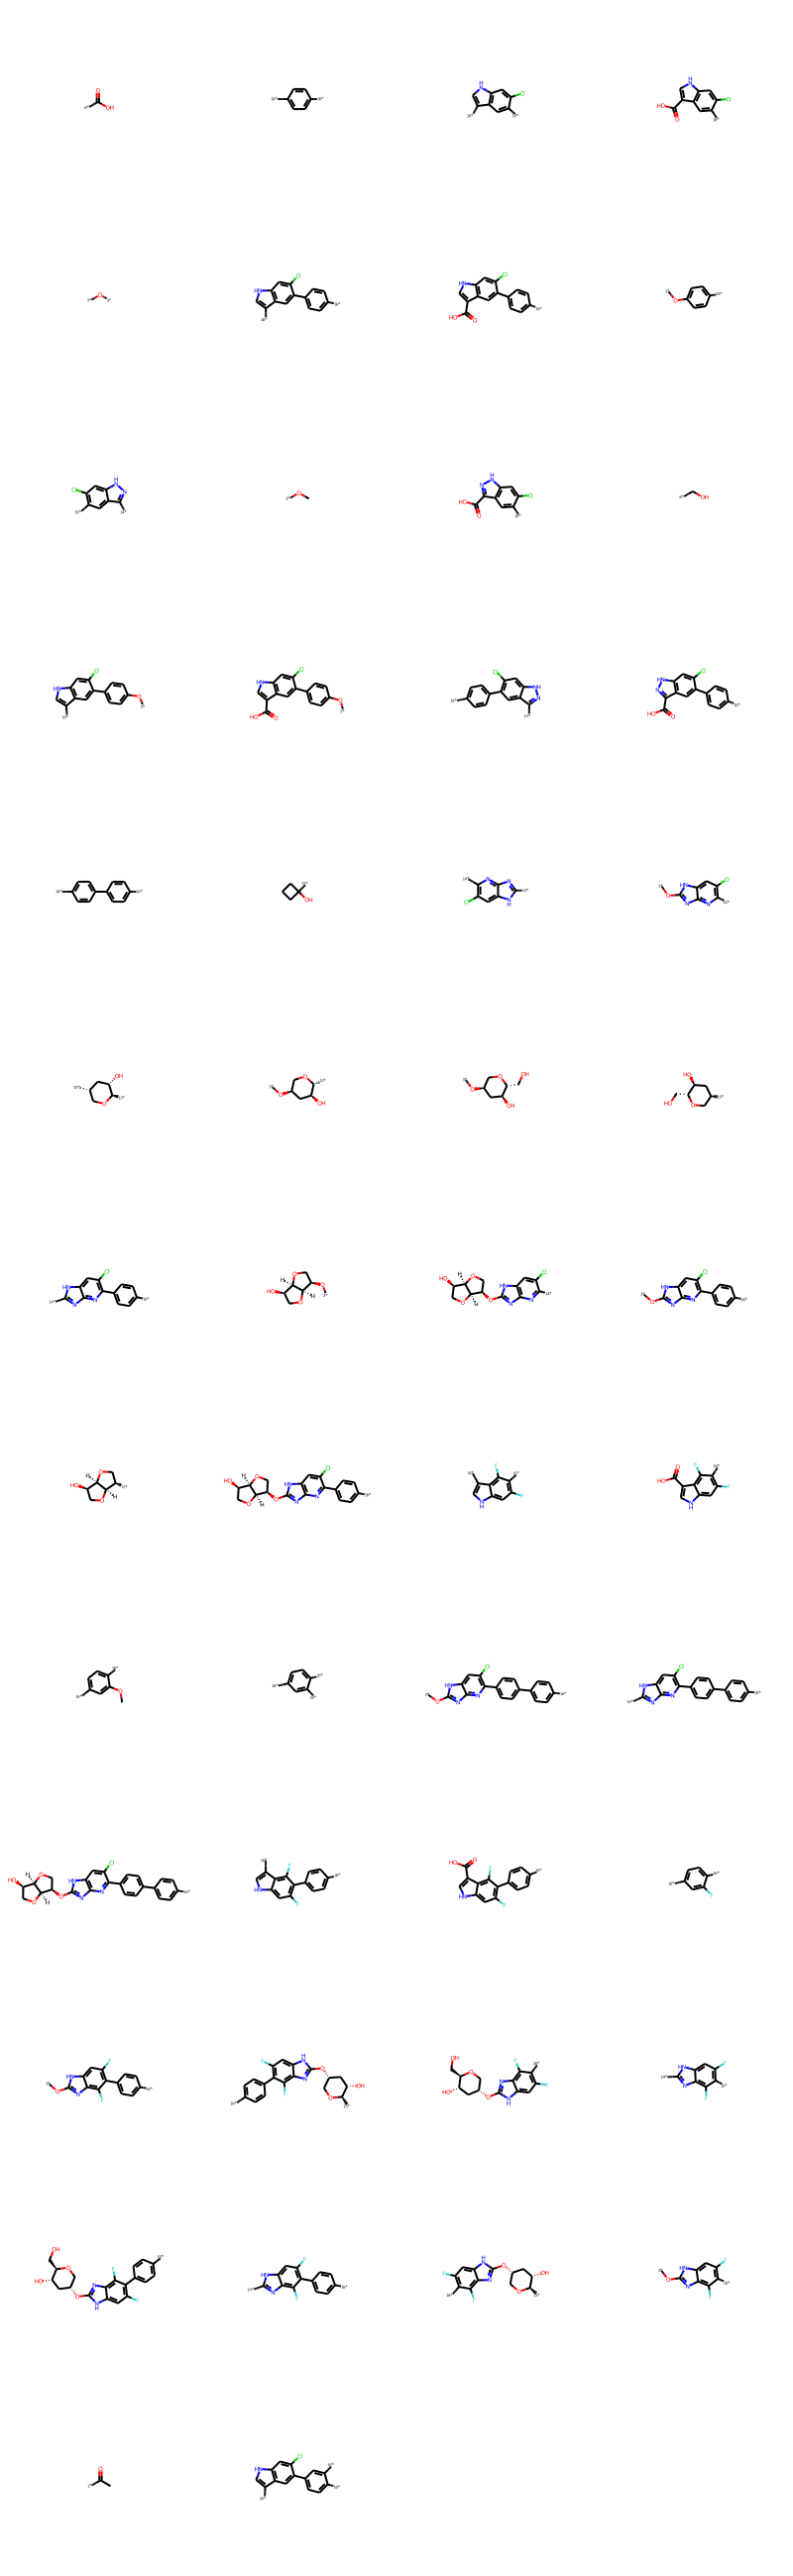

In [11]:
from rdkit.Chem import BRICS
from rdkit import Chem
import pandas as pd
from tqdm import tqdm 
df=pd.read_csv('/public/home/chensheng/project/aixb3/data/prepared_data/act_lig_1/prkab1.csv')

allfrags={}
tbar=tqdm(df['SMILES'])
for smiles in tbar:
    m = Chem.MolFromSmiles(smiles)
    for s in BRICS.BRICSDecompose(m,keepNonLeafNodes=True):
        if s not in allfrags:
            allfrags[s]=0
        allfrags[s]+=1
    tbar.set_postfix({'len':len(allfrags)})
allfrags= sorted(allfrags.items(), key=lambda d:d[1], reverse = True)
print(allfrags)
fragms = [Chem.MolFromSmiles(x[0]) for x in allfrags]
Chem.Draw.MolsToGridImage(fragms, molsPerRow=4, subImgSize=(200, 200))

    # ms = BRICS.BRICSBuild(fragms,scrambleReagents=False)
    # prods = [x for x in ms]
    # [prod.UpdatePropertyCache(strict=False) for prod in prods]
    # Chem.Draw.MolsToGridImage(prods, molsPerRow=4, subImgSize=(200, 200))

In [74]:
from rdkit.Chem import BRICS
from rdkit import Chem
import pandas as pd
from tqdm import tqdm 
from rdkit.Chem import rdFMCS
df=pd.read_csv('/public/home/chensheng/project/aixb3/data/prepared_data/act_lig_2/jak1.csv')

allfrags={}
tbar=tqdm(df['SMILES'])
for smiles in tbar:
    m = Chem.MolFromSmiles(smiles)
    for ms in BRICS.BRICSDecompose(m,keepNonLeafNodes=True,returnMols=True):
        for a in ms.GetAtoms():
            a.SetIsotope(0)
        s=Chem.MolToSmiles(ms)
        if s not in allfrags:
            allfrags[s]=0
        allfrags[s]+=1
    tbar.set_postfix({'len':len(allfrags)})
allfrags= sorted(allfrags.items(), key=lambda d:d[1], reverse = True)


  0%|          | 0/7307 [00:00<?, ?it/s]

100%|██████████| 7307/7307 [02:55<00:00, 41.57it/s, len=68383]


('*c1nn(*)cc1C(N)=O', 1508)
('*Nc1nn(*)cc1C(N)=O', 1508)
('*c1ncnc2[nH]ccc12', 1175)
('*c1nn(*)c2cc[nH]c(=O)c12', 923)
('*Nc1nn(*)c2cc[nH]c(=O)c12', 922)
('*N(C)c1ncnc2[nH]ccc12', 638)
('*N1CCC(*)(CC#N)CC1', 557)
('*c1cnn(C2(*)CN(*)C2)c1', 473)
('*c1cnn(C2(CC#N)CN(*)C2)c1', 467)
('*c1nnn2cnc3[nH]ccc3c12', 453)
('*c1cn(C2(*)CCN(*)CC2)nc1*', 407)
('*Nc1nn(C2(*)CCN(*)CC2)cc1*', 407)
('*c1nn(C2(*)CCN(*)CC2)cc1C(N)=O', 406)
('*Nc1nn(C2(*)CCN(*)CC2)cc1C(N)=O', 406)
('*c1cn(C2(CC#N)CCN(*)CC2)nc1*', 405)
('*Nc1nn(C2(CC#N)CCN(*)CC2)cc1*', 405)
('*c1nn(C2(CC#N)CCN(*)CC2)cc1C(N)=O', 404)
('*Nc1nn(C2(CC#N)CCN(*)CC2)cc1C(N)=O', 404)
('*N1CCC(N2CC(*)(*)C2)CC1', 382)
('*C(=O)N1CCC(*)CC1', 381)
('*n1cc(-c2ncnc3[nH]ccc23)cn1', 378)
('*N1CCC(N2CC(*)(CC#N)C2)CC1', 378)
('*n1cc(C(N)=O)c(Nc2ccc(F)cc2)n1', 370)
('*c1cn(*)nc1Nc1ccc(F)cc1', 370)
('*[C@H]1C[C@@H](N(C)c2ncnc3[nH]ccc23)C1', 365)
('*N1CC(*)(n2cc(-c3ncnc4[nH]ccc34)cn2)C1', 357)
('*C(=O)N1CCC(*)(*)CC1', 355)
('*N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)cn2

/home/chensheng/anaconda3/envs/py37/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 200. Change the maxMols value to display more.
  % (maxMols))


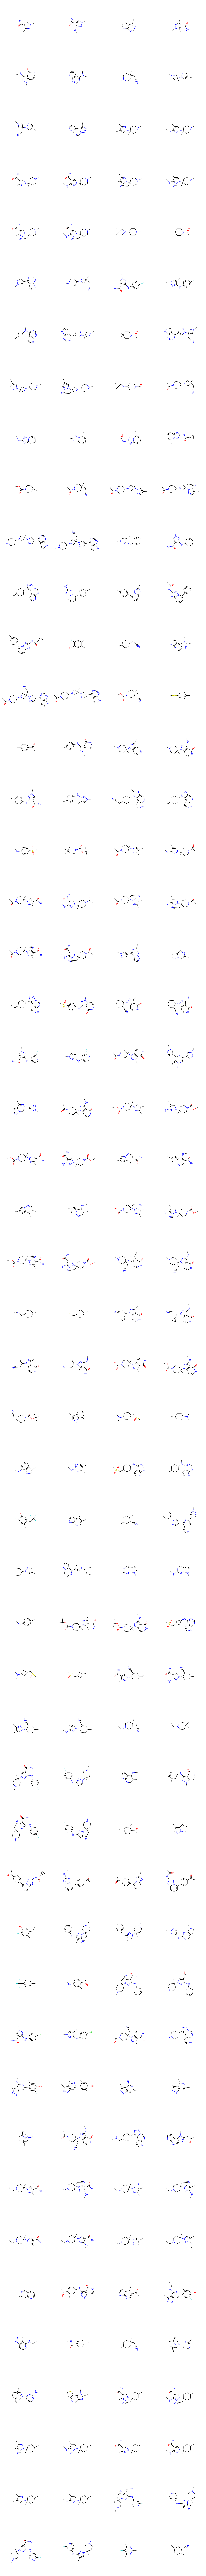

In [76]:
fragms=[]
for x in allfrags:
    m=Chem.MolFromSmiles(x[0])
    if len(m.GetAtoms())>9:
        print(x)
        fragms.append(m)
Chem.Draw.MolsToGridImage(fragms, molsPerRow=4, subImgSize=(400, 400), maxMols=200)

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),)
()
()
()
()
()


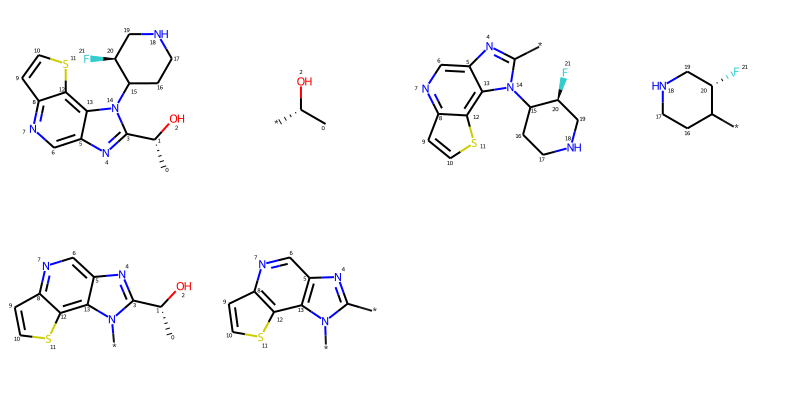

In [75]:
from rdkit.Chem import rdFMCS
m = Chem.MolFromSmiles(smiles)
for a in m.GetAtoms():
    a.SetProp('atomNote',str(a.GetIdx()))

f=list(BRICS.BRICSDecompose(m,keepNonLeafNodes=True,returnMols=True))
for ff in f:
    for a in ff.GetAtoms():
        a.SetIsotope(0)
    # res = rdFMCS.FindMCS([m,ff])
    print(m.GetSubstructMatches(ff))
    # f.append(res.queryMol)
    # print(Chem.MolToSmiles(res.queryMol))
Chem.Draw.MolsToGridImage(f, molsPerRow=4, subImgSize=(200, 200))